In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# required library for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
import os
path= r"C:\Users\Lenovo\Desktop\DATA SETS"
os.chdir(path)
os.listdir(path)


weather=pd.read_csv("weather_data.csv",low_memory=False)

In [3]:
weather.head(15)

,Outlook,Temperature,Humidity,Wind,Play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Cool,Normal,Weak,Yes
4,Rain,Cool,Normal,Strong,No
5,Sunny,Mild,High,Weak,No
6,Sunny,Cool,Normal,Weak,Yes
7,Rain,Mild,Normal,Weak,Yes
8,Sunny,Mild,Normal,Strong,Yes
9,Overcast,Mild,High,Strong,Yes


In [4]:
y = weather["Play"]
x = weather.drop(["Play"],axis=1)

In [5]:
print(y.shape)
print(x.shape)

(14,)
(14, 4)


In [6]:
#Encoding
#Try label encoding

x_dummies = pd.get_dummies(x)
x_dummies

,Outlook_Overcast,Outlook_Rain,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,0,0,1,0,1,0,1,0,0,1
1,0,0,1,0,1,0,1,0,1,0
2,1,0,0,0,1,0,1,0,0,1
3,0,1,0,1,0,0,0,1,0,1
4,0,1,0,1,0,0,0,1,1,0
5,0,0,1,0,0,1,1,0,0,1
6,0,0,1,1,0,0,0,1,0,1
7,0,1,0,0,0,1,0,1,0,1
8,0,0,1,0,0,1,0,1,1,0
9,1,0,0,0,0,1,1,0,1,0


In [7]:
x_train,x_test,y_train,y_test = train_test_split(x_dummies,y,test_size=0.3,random_state=0)

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(criterion="entropy")
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
y_pred=clf.predict(x_test)
y_pred

array(['No', 'No', 'Yes', 'Yes', 'Yes'], dtype=object)

In [10]:
y_test

8     Yes
6     Yes
4      No
11     No
2     Yes
Name: Play, dtype: object

In [11]:
#Compute accuracy and Display confusion matrix

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [13]:
confusion_matrix(y_test,y_pred)

array([[0, 2],
       [2, 1]], dtype=int64)

In [15]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n          No       0.00      0.00      0.00         2\n         Yes       0.33      0.33      0.33         3\n\n    accuracy                           0.20         5\n   macro avg       0.17      0.17      0.17         5\nweighted avg       0.20      0.20      0.20         5\n'

In [20]:
cols=list(x_dummies.columns.values)
cols

['Outlook_Overcast',
 'Outlook_Rain',
 'Outlook_Sunny',
 'Temperature_Cool',
 'Temperature_Hot',
 'Temperature_Mild',
 'Humidity_High',
 'Humidity_Normal',
 'Wind_Strong',
 'Wind_Weak']

In [17]:
#Sklearn should have 0.21.2 version not 0.20.1 version!
#Steps first uninstall in conda prompt by= pip uninstall scikit-learn
#second step=pip install scikit-learn==0.21

In [16]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.21.0.


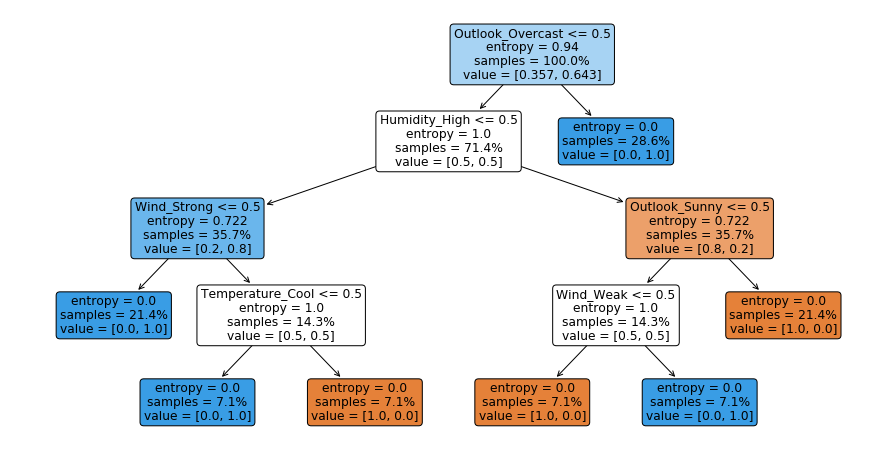

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,8))

tree.plot_tree(clf.fit(x_dummies,y),feature_names=cols,filled=True,precision=3,proportion=True,rounded=True)
plt.show()